In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics
import math
from scipy.stats import pearsonr
df = pd.read_csv("mortality.csv")

In [175]:
df = df[df["Time Period"] == "3-month period"]
df = df[df["Rate Type"] == "Crude"]
# list_of_diseases = ["Cancer", "Heart disease",
#                     "Stroke", "Diabetes", "Homicide", "COVID-19"]
# df = df[df["Cause of Death"].isin(
#     list_of_diseases)]
df_subset = df.loc[:, ['Year and Quarter', 'Cause of Death', "Overall Rate"]]
years_ordered = ['2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4',
                 '2022 Q1', '2022 Q2', '2022 Q3']
df = df_subset[df_subset["Year and Quarter"].isin(years_ordered)]
df


,Year and Quarter,Cause of Death,Overall Rate
858,2020 Q1,All causes,944.9
859,2020 Q1,Alzheimer disease,40.0
860,2020 Q1,COVID-19,8.2
861,2020 Q1,Cancer,185.6
862,2020 Q1,Chronic liver disease and cirrhosis,14.3
...,...,...,...
1315,2022 Q3,Pneumonitis due to solids and liquids,5.4
1316,2022 Q3,Septicemia,12.0
1317,2022 Q3,Stroke,47.3
1318,2022 Q3,Suicide,NaN


wrangling



In [176]:
change_matrix = {}
list_of_diseases = df["Cause of Death"].unique().tolist()
for i in list_of_diseases:
    if i in ["All causes"]:
        continue
    change_matrix[i]=[]
    df_temp = df[df["Cause of Death"]==i].reset_index(drop=True)
    # print(df_temp.head(20))
    for j in range(1,len(df_temp.index.values)):
        change_in = df_temp.loc[j, "Overall Rate"] - df_temp.loc[j-1, "Overall Rate"]
        if change_in > 0:
            change_matrix[i].append(1)
        elif change_in == 0:
            change_matrix[i].append(0)
        else: 
            change_matrix[i].append(-1)

    
# print(change_matrix)

distance_matrix={}
for i in list_of_diseases:
    if i in ["COVID-19", "All causes"]:
        continue
    distance_matrix[i]=[]
    for j in range(len(change_matrix[i])):
        dist = ((change_matrix[i][j] - change_matrix["COVID-19"][j])**2)
        if not math.isnan(dist):
            distance_matrix[i].append(dist)

for key in distance_matrix.keys():
    distance_matrix[key] = sum(distance_matrix[key])**0.5

# convert dictionary to DataFrame
distance_df = pd.DataFrame.from_dict(
    distance_matrix, orient='index', columns=['Distance']).sort_values("Distance")

distance_df


,Distance
Alzheimer disease,2.236068
Diabetes,2.828427
Stroke,3.464102
Parkinson disease,3.464102
Hypertension,3.464102
Heart disease,3.464102
HIV disease,3.464102
Chronic lower respiratory diseases,3.464102
Chronic liver disease and cirrhosis,3.464102
Septicemia,3.741657


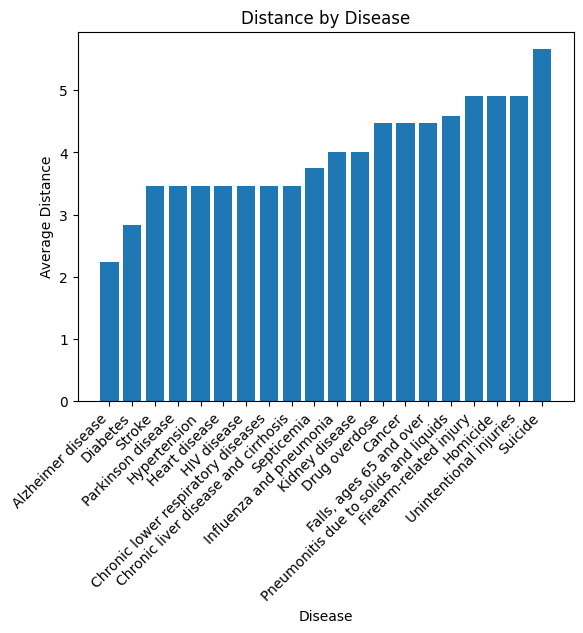

In [177]:
# create bar chart
plt.bar(distance_df.index.values, distance_df['Distance'])

# add title and axis labels
# plt.ylim(bottom=60)
plt.xticks(rotation=45, ha='right')

plt.title('Distance by Disease')
plt.xlabel('Disease')
plt.ylabel('Average Distance')

# show plot
plt.show()


In [178]:
hyptest = {}
for i in list_of_diseases:
    if i in ["COVID-19", "All causes"]:
        continue
    df1 = df[df["Cause of Death"] == "COVID-19"].loc[:,
                                                     ["Overall Rate", "Year and Quarter"]].reset_index(drop=True)
    df2 = df[df["Cause of Death"] == i].loc[:,
                                                        ["Overall Rate", "Year and Quarter"]].reset_index(drop=True)
    merged_df = pd.merge(df1, df2, on='Year and Quarter')
    merged_df = merged_df.dropna()
    corr, p_value = pearsonr(
        merged_df["Overall Rate_x"], merged_df["Overall Rate_y"])
    hyptest[i]=[corr,p_value]
hyptest_df = pd.DataFrame.from_dict(
    hyptest, orient='index', columns=['corr', 'p_value'])
hyptest_df.sort_values("p_value", ascending=True)


,corr,p_value
Diabetes,0.890800,0.000234
Hypertension,0.770477,0.005520
Parkinson disease,0.645799,0.031841
Chronic liver disease and cirrhosis,0.640342,0.033804
Heart disease,0.627717,0.038666
Alzheimer disease,0.605695,0.048274
Stroke,0.575196,0.064124
Suicide,-0.420388,0.226411
"Falls, ages 65 and over",0.406899,0.243215
HIV disease,0.350851,0.290096
